# Foreign exchange rate API
* exchange rate api: https://exchangeratesapi.io/
* currency code (ISO 4217): https://en.wikipedia.org/wiki/ISO_4217

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

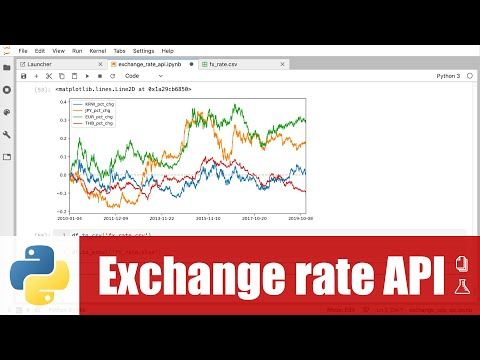

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('tko93L_QPIE', width=720, height=405)

In [1]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas   version: {pd.__version__}')
print(f'json     version: {json.__version__}')
print(f'requests version: {requests.__version__}')

pandas   version: 1.4.4
json     version: 2.0.9
requests version: 2.25.1


---

In [3]:
pd.Timestamp.now()

Timestamp('2022-09-28 11:31:07.895956')

In [ ]:
r=requests.get('https://api.exchangeratesapi.io/latest')
r.text

'{"rates":{"CAD":1.4471,"HKD":8.6713,"ISK":136.9,"PHP":56.983,"DKK":7.4731,"HUF":330.53,"CZK":25.36,"AUD":1.6031,"RON":4.7784,"SEK":10.4858,"IDR":15536.69,"INR":80.0085,"BRL":4.5271,"RUB":69.119,"HRK":7.4463,"JPY":120.54,"THB":33.614,"CHF":1.084,"SGD":1.5047,"PLN":4.2493,"BGN":1.9558,"TRY":6.6587,"CNY":7.7712,"NOK":9.8315,"NZD":1.6718,"ZAR":15.9222,"USD":1.1147,"MXN":21.1433,"ILS":3.8766,"GBP":0.85115,"KRW":1300.32,"MYR":4.5725},"base":"EUR","date":"2020-01-03"}'

In [ ]:
j=json.loads(r.text)
j

{'rates': {'CAD': 1.4471,
  'HKD': 8.6713,
  'ISK': 136.9,
  'PHP': 56.983,
  'DKK': 7.4731,
  'HUF': 330.53,
  'CZK': 25.36,
  'AUD': 1.6031,
  'RON': 4.7784,
  'SEK': 10.4858,
  'IDR': 15536.69,
  'INR': 80.0085,
  'BRL': 4.5271,
  'RUB': 69.119,
  'HRK': 7.4463,
  'JPY': 120.54,
  'THB': 33.614,
  'CHF': 1.084,
  'SGD': 1.5047,
  'PLN': 4.2493,
  'BGN': 1.9558,
  'TRY': 6.6587,
  'CNY': 7.7712,
  'NOK': 9.8315,
  'NZD': 1.6718,
  'ZAR': 15.9222,
  'USD': 1.1147,
  'MXN': 21.1433,
  'ILS': 3.8766,
  'GBP': 0.85115,
  'KRW': 1300.32,
  'MYR': 4.5725},
 'base': 'EUR',
 'date': '2020-01-03'}

In [ ]:
j['rates']

{'CAD': 1.4471,
 'HKD': 8.6713,
 'ISK': 136.9,
 'PHP': 56.983,
 'DKK': 7.4731,
 'HUF': 330.53,
 'CZK': 25.36,
 'AUD': 1.6031,
 'RON': 4.7784,
 'SEK': 10.4858,
 'IDR': 15536.69,
 'INR': 80.0085,
 'BRL': 4.5271,
 'RUB': 69.119,
 'HRK': 7.4463,
 'JPY': 120.54,
 'THB': 33.614,
 'CHF': 1.084,
 'SGD': 1.5047,
 'PLN': 4.2493,
 'BGN': 1.9558,
 'TRY': 6.6587,
 'CNY': 7.7712,
 'NOK': 9.8315,
 'NZD': 1.6718,
 'ZAR': 15.9222,
 'USD': 1.1147,
 'MXN': 21.1433,
 'ILS': 3.8766,
 'GBP': 0.85115,
 'KRW': 1300.32,
 'MYR': 4.5725}

In [ ]:
j['rates']['THB']

33.614

## แปลง dict เป็น pandas.Series

In [ ]:
fx=pd.Series(j['rates'])
fx

CAD        1.44710
HKD        8.67130
ISK      136.90000
PHP       56.98300
DKK        7.47310
HUF      330.53000
CZK       25.36000
AUD        1.60310
RON        4.77840
SEK       10.48580
IDR    15536.69000
INR       80.00850
BRL        4.52710
RUB       69.11900
HRK        7.44630
JPY      120.54000
THB       33.61400
CHF        1.08400
SGD        1.50470
PLN        4.24930
BGN        1.95580
TRY        6.65870
CNY        7.77120
NOK        9.83150
NZD        1.67180
ZAR       15.92220
USD        1.11470
MXN       21.14330
ILS        3.87660
GBP        0.85115
KRW     1300.32000
MYR        4.57250
dtype: float64

In [ ]:
fx['THB']

33.614

## อัตราแลกเปลี่ยนเมื่อเทียบกับสกุลเงิน US dollar (USD)

In [ ]:
r=requests.get('https://api.exchangeratesapi.io/latest?base=USD')
r.text

'{"rates":{"CAD":1.2981968243,"HKD":7.7790436889,"ISK":122.813312999,"PHP":51.1195837445,"DKK":6.7041356419,"HUF":296.5192428456,"CZK":22.7505158339,"GBP":0.7635686732,"RON":4.2867139141,"SEK":9.40683592,"IDR":13938.0012559433,"INR":71.7758141204,"BRL":4.0612720911,"RUB":62.0068179779,"HRK":6.6800932986,"JPY":108.1367183996,"THB":30.1551987082,"CHF":0.9724589576,"EUR":0.8971023594,"MYR":4.1020005383,"BGN":1.7545527945,"TRY":5.9735354804,"CNY":6.9715618552,"NOK":8.8198618462,"NZD":1.4997757244,"ZAR":14.2838431865,"USD":1.0,"MXN":18.9677043151,"SGD":1.3498699202,"AUD":1.4381447923,"ILS":3.4777070064,"KRW":1166.520139948,"PLN":3.8120570557},"base":"USD","date":"2020-01-03"}'

In [ ]:
j=json.loads(r.text)
j['rates']['THB']

30.1551987082

## สร้างฟังก์ชันสำหรับดึงข้อมูล JSON

In [ ]:
def get_api_result(url):
    r=requests.get(url)
    return json.loads(r.text)

In [ ]:
j=get_api_result('https://api.exchangeratesapi.io/latest?base=USD')
j['rates']

{'CAD': 1.2981968243,
 'HKD': 7.7790436889,
 'ISK': 122.813312999,
 'PHP': 51.1195837445,
 'DKK': 6.7041356419,
 'HUF': 296.5192428456,
 'CZK': 22.7505158339,
 'GBP': 0.7635686732,
 'RON': 4.2867139141,
 'SEK': 9.40683592,
 'IDR': 13938.0012559433,
 'INR': 71.7758141204,
 'BRL': 4.0612720911,
 'RUB': 62.0068179779,
 'HRK': 6.6800932986,
 'JPY': 108.1367183996,
 'THB': 30.1551987082,
 'CHF': 0.9724589576,
 'EUR': 0.8971023594,
 'MYR': 4.1020005383,
 'BGN': 1.7545527945,
 'TRY': 5.9735354804,
 'CNY': 6.9715618552,
 'NOK': 8.8198618462,
 'NZD': 1.4997757244,
 'ZAR': 14.2838431865,
 'USD': 1.0,
 'MXN': 18.9677043151,
 'SGD': 1.3498699202,
 'AUD': 1.4381447923,
 'ILS': 3.4777070064,
 'KRW': 1166.520139948,
 'PLN': 3.8120570557}

## ดึงข้อมูลอัตราแลกเปลี่ยนในอดีตหลายสกุลเงินพร้อมกันโดยเทียบกับสกุลเงิน US dollar (USD)

In [ ]:
url='https://api.exchangeratesapi.io/history?start_at=2018-01-01&end_at=2018-09-01&symbols=THB,JPY&base=USD'
j=get_api_result(url)
j['rates']

{'2018-05-04': {'JPY': 108.9230512156, 'THB': 31.7553680341},
 '2018-08-27': {'JPY': 111.0289693114, 'THB': 32.6046591593},
 '2018-06-08': {'JPY': 109.4435936702, 'THB': 32.0597243492},
 '2018-08-22': {'JPY': 110.261707989, 'THB': 32.7298553719},
 '2018-07-19': {'JPY': 113.030721436, 'THB': 33.4803244736},
 '2018-05-23': {'JPY': 109.8479672019, 'THB': 32.1498120943},
 '2018-01-18': {'JPY': 111.2137310993, 'THB': 31.9199019207},
 '2018-07-30': {'JPY': 111.0835330366, 'THB': 33.300239644},
 '2018-05-10': {'JPY': 109.6312510524, 'THB': 32.0601111298},
 '2018-05-22': {'JPY': 110.8190605393, 'THB': 32.0145836866},
 '2018-06-11': {'JPY': 109.9406276506, 'THB': 32.0797285835},
 '2018-08-06': {'JPY': 111.4788183315, 'THB': 33.350082301},
 '2018-02-28': {'JPY': 107.0247257246, 'THB': 31.4303258556},
 '2018-04-13': {'JPY': 107.6885605261, 'THB': 31.1496305919},
 '2018-04-04': {'JPY': 106.247963506, 'THB': 31.2504072988},
 '2018-03-01': {'JPY': 106.7948401939, 'THB': 31.5701257087},
 '2018-01-02'

## แปลงข้อมูลให้เป็น pandas.DataFrame

In [ ]:
pd.DataFrame(j['rates'])

,2018-05-04,2018-08-27,2018-06-08,2018-08-22,2018-07-19,2018-05-23,2018-01-18,2018-07-30,2018-05-10,2018-05-22,...,2018-01-19,2018-07-10,2018-01-25,2018-06-29,2018-01-10,2018-01-05,2018-06-26,2018-03-28,2018-04-20,2018-01-15
JPY,108.923051,111.028969,109.443594,110.261708,113.030721,109.847967,111.213731,111.083533,109.631251,110.819061,...,110.599755,111.243917,108.906263,110.687940,111.424283,113.28352,109.621316,106.146153,107.571696,110.621487
THB,31.755368,32.604659,32.059724,32.729855,33.480324,32.149812,31.919902,33.300240,32.060111,32.014584,...,31.880049,33.189618,31.420166,33.080288,32.109740,32.19012,33.004626,31.250202,31.320172,31.924737


In [ ]:
df=pd.DataFrame(j['rates']).T
df

,JPY,THB
2018-05-04,108.923051,31.755368
2018-08-27,111.028969,32.604659
2018-06-08,109.443594,32.059724
2018-08-22,110.261708,32.729855
2018-07-19,113.030721,33.480324
...,...,...
2018-01-05,113.283520,32.190120
2018-06-26,109.621316,33.004626
2018-03-28,106.146153,31.250202
2018-04-20,107.571696,31.320172


## เรียงข้อมูลตามวัน (จากน้อยไปมาก หรือจากอดีตมาสู่ปัจจุบัน)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df

,JPY,THB
2018-01-02,112.184003,32.420224
2018-01-03,112.259835,32.529319
2018-01-04,112.656444,32.219644
2018-01-05,113.283520,32.190120
2018-01-08,113.037668,32.209972
...,...,...
2018-08-27,111.028969,32.604659
2018-08-28,111.041845,32.534586
2018-08-29,111.260720,32.710120
2018-08-30,111.460828,32.705269


## การคำนวณวัน

In [ ]:
(pd.Timestamp.now() - pd.DateOffset(days=15))

Timestamp('2019-12-21 10:01:55.461902')

In [ ]:
(pd.Timestamp.now() - pd.DateOffset(days=15)).strftime("%Y-%m-%d")

'2019-12-21'

In [ ]:
symbols=['THB', 'JPY']
','.join(symbols)

'THB,JPY'

## สร้างฟังก์ชันเพื่อดึงข้อมูลอัตราแลกเปลี่ยนให้สะดวกยิ่งขึ้น

In [ ]:
def get_exchange_rate(start_dt=None, end_dt=None, symbols=['THB'], base_currency='USD'):
    if start_dt is None:
        start_dt = (pd.Timestamp.now() - pd.DateOffset(days=15)).strftime("%Y-%m-%d")
    if end_dt is None:
        end_dt = pd.Timestamp.now().strftime("%Y-%m-%d")
    url=f'https://api.exchangeratesapi.io/history?start_at={start_dt}&end_at={end_dt}&symbols={",".join(symbols)}&base={base_currency}'
    print(url)
    r=requests.get(url)
    j=json.loads(r.text)
    df=pd.DataFrame(j['rates']).T
    df.sort_index(inplace=True)
    return df

In [ ]:
get_exchange_rate()

https://api.exchangeratesapi.io/history?start_at=2019-12-21&end_at=2020-01-05&symbols=THB&base=USD


,THB
2019-12-23,30.165237
2019-12-24,30.155235
2019-12-27,30.155115
2019-12-30,29.915095
2019-12-31,29.744526
2020-01-02,30.144733
2020-01-03,30.155199


In [ ]:
df=get_exchange_rate('2019-01-01', '2019-12-31', ['THB', 'JPY'])
df

https://api.exchangeratesapi.io/history?start_at=2019-01-01&end_at=2019-12-31&symbols=THB,JPY&base=USD


,JPY,THB
2019-01-02,109.046240,32.295341
2019-01-03,107.692986,32.180120
2019-01-04,108.041743,32.085416
2019-01-07,108.256881,31.985146
2019-01-08,108.793706,32.084790
...,...,...
2019-12-23,109.417607,30.165237
2019-12-24,109.377256,30.155235
2019-12-27,109.593831,30.155115
2019-12-30,109.205470,29.915095


In [ ]:
df['THB']

2019-01-02    32.295341
2019-01-03    32.180120
2019-01-04    32.085416
2019-01-07    31.985146
2019-01-08    32.084790
                ...    
2019-12-23    30.165237
2019-12-24    30.155235
2019-12-27    30.155115
2019-12-30    29.915095
2019-12-31    29.744526
Name: THB, Length: 255, dtype: float64

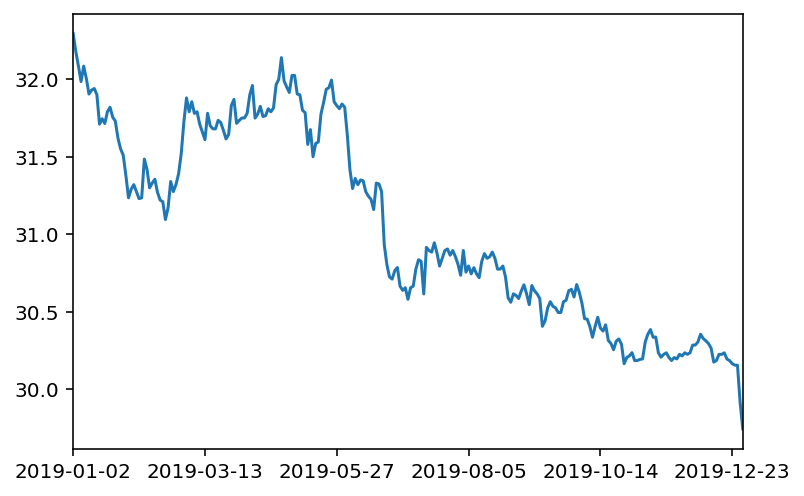

In [ ]:
df['THB'].plot()

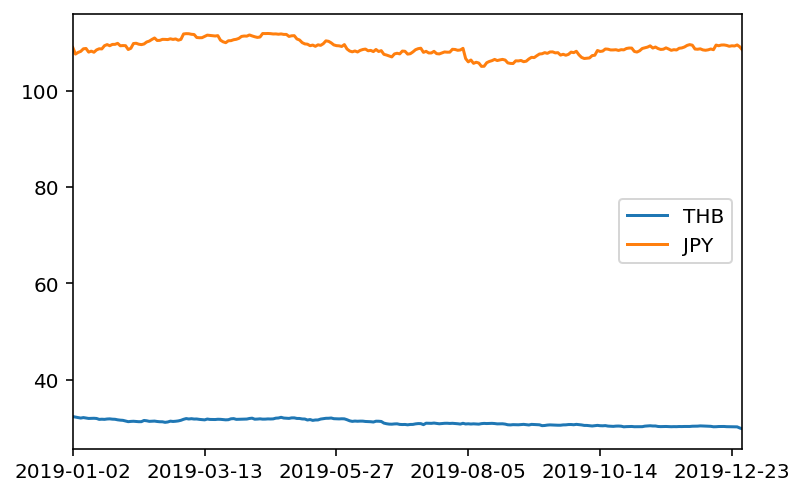

In [ ]:
df[['THB', 'JPY']].plot()

In [ ]:
df['THB']

2019-01-02    32.295341
2019-01-03    32.180120
2019-01-04    32.085416
2019-01-07    31.985146
2019-01-08    32.084790
                ...    
2019-12-23    30.165237
2019-12-24    30.155235
2019-12-27    30.155115
2019-12-30    29.915095
2019-12-31    29.744526
Name: THB, Length: 255, dtype: float64

In [ ]:
df['THB'][0]

32.2953408792

## หา % การเปลี่ยนแปลงของอัตราแลกเปลี่ยนในแต่ละวันโดยเทียบกับข้อมูลวันแรก

In [ ]:
df['THB_pct_chg']=df['THB'] / df['THB'][0] - 1
df['JPY_pct_chg']=df['JPY'] / df['JPY'][0] - 1
df

,JPY,THB,THB_pct_chg,JPY_pct_chg
2019-01-02,109.046240,32.295341,0.000000,0.000000
2019-01-03,107.692986,32.180120,-0.003568,-0.012410
2019-01-04,108.041743,32.085416,-0.006500,-0.009212
2019-01-07,108.256881,31.985146,-0.009605,-0.007239
2019-01-08,108.793706,32.084790,-0.006520,-0.002316
...,...,...,...,...
2019-12-23,109.417607,30.165237,-0.065957,0.003406
2019-12-24,109.377256,30.155235,-0.066267,0.003036
2019-12-27,109.593831,30.155115,-0.066270,0.005022
2019-12-30,109.205470,29.915095,-0.073702,0.001460


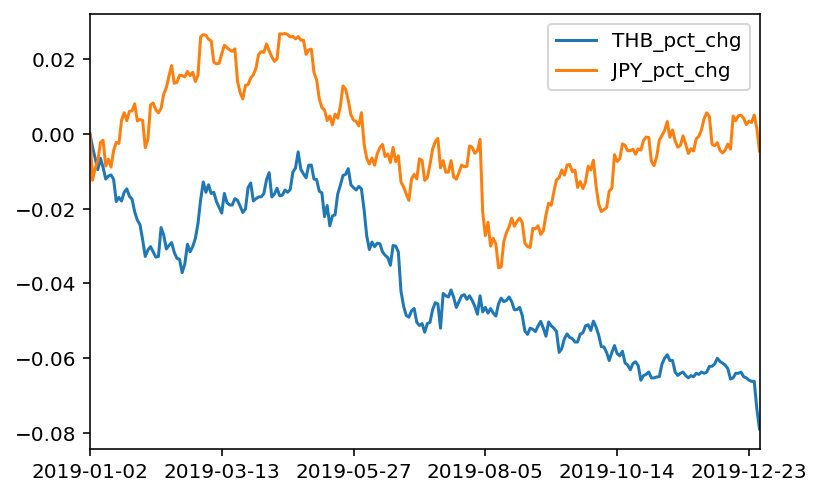

In [ ]:
df[['THB_pct_chg', 'JPY_pct_chg']].plot()

In [ ]:
df=get_exchange_rate('2010-01-01', '2019-12-31', ['THB', 'JPY', 'KRW', 'EUR'])
df

https://api.exchangeratesapi.io/history?start_at=2010-01-01&end_at=2019-12-31&symbols=THB,JPY,KRW,EUR&base=USD


,KRW,JPY,EUR,THB
2010-01-04,1155.306137,92.862603,0.694975,33.205226
2010-01-05,1139.551309,91.773993,0.692425,33.140839
2010-01-06,1134.355401,92.466899,0.696864,33.157491
2010-01-07,1134.997204,93.330537,0.699105,33.164849
2010-01-08,1130.813424,93.435157,0.700624,33.159812
...,...,...,...,...
2019-12-23,1163.449210,109.417607,0.902935,30.165237
2019-12-24,1162.193141,109.377256,0.902527,30.155235
2019-12-27,1160.602528,109.593831,0.896620,30.155115
2019-12-30,1156.805791,109.205470,0.893735,29.915095


## ใช้ loop ในการคำนวณ % การเปลี่ยนแปลงอัตราแลกเปลี่ยนในแต่ละสกุลเงิน

In [ ]:
df.columns

Index(['KRW', 'JPY', 'EUR', 'THB'], dtype='object')

In [ ]:
for c in df.columns:
    df[f'{c}_pct_chg']=df[c]/df[c][0] - 1

In [ ]:
df

,KRW,JPY,EUR,THB,KRW_pct_chg,JPY_pct_chg,EUR_pct_chg,THB_pct_chg
2010-01-04,1155.306137,92.862603,0.694975,33.205226,0.000000,0.000000,0.000000,0.000000
2010-01-05,1139.551309,91.773993,0.692425,33.140839,-0.013637,-0.011723,-0.003670,-0.001939
2010-01-06,1134.355401,92.466899,0.696864,33.157491,-0.018134,-0.004261,0.002718,-0.001438
2010-01-07,1134.997204,93.330537,0.699105,33.164849,-0.017579,0.005039,0.005942,-0.001216
2010-01-08,1130.813424,93.435157,0.700624,33.159812,-0.021200,0.006166,0.008127,-0.001368
...,...,...,...,...,...,...,...,...
2019-12-23,1163.449210,109.417607,0.902935,30.165237,0.007048,0.178274,0.299233,-0.091552
2019-12-24,1162.193141,109.377256,0.902527,30.155235,0.005961,0.177840,0.298646,-0.091853
2019-12-27,1160.602528,109.593831,0.896620,30.155115,0.004584,0.180172,0.290146,-0.091856
2019-12-30,1156.805791,109.205470,0.893735,29.915095,0.001298,0.175990,0.285995,-0.099085


In [ ]:
df.columns

Index(['KRW', 'JPY', 'EUR', 'THB', 'KRW_pct_chg', 'JPY_pct_chg', 'EUR_pct_chg',
       'THB_pct_chg'],
      dtype='object')

## แสดงกราฟอัตราแลกเปลี่ยนแต่ละสกุลเงิน

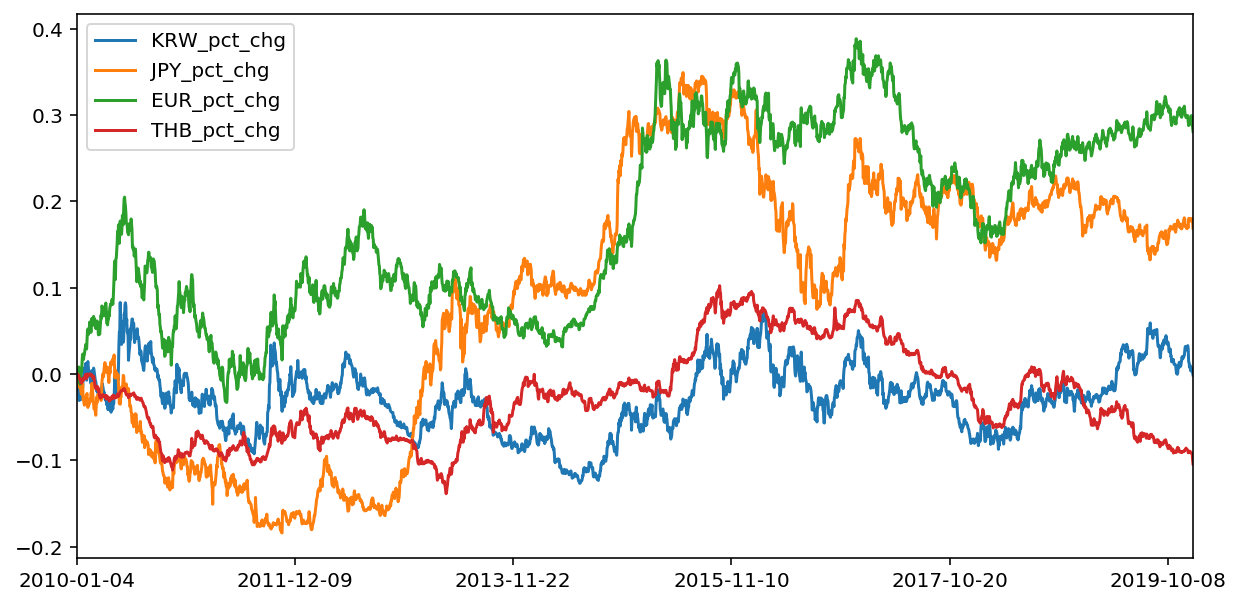

In [ ]:
df[['KRW_pct_chg', 'JPY_pct_chg', 'EUR_pct_chg', 'THB_pct_chg']].plot(figsize=(10, 5))

## เทคนิคการใช้ filter เพื่อเลือกคอลัมน์ตามชื่อ (ในที่นี้คือชื่อคอลัมน์ที่ลงท้ายด้วย _pct_chg) 

In [ ]:
df.filter(regex='_pct_chg$')

,KRW_pct_chg,JPY_pct_chg,EUR_pct_chg,THB_pct_chg
2010-01-04,0.000000,0.000000,0.000000,0.000000
2010-01-05,-0.013637,-0.011723,-0.003670,-0.001939
2010-01-06,-0.018134,-0.004261,0.002718,-0.001438
2010-01-07,-0.017579,0.005039,0.005942,-0.001216
2010-01-08,-0.021200,0.006166,0.008127,-0.001368
...,...,...,...,...
2019-12-23,0.007048,0.178274,0.299233,-0.091552
2019-12-24,0.005961,0.177840,0.298646,-0.091853
2019-12-27,0.004584,0.180172,0.290146,-0.091856
2019-12-30,0.001298,0.175990,0.285995,-0.099085


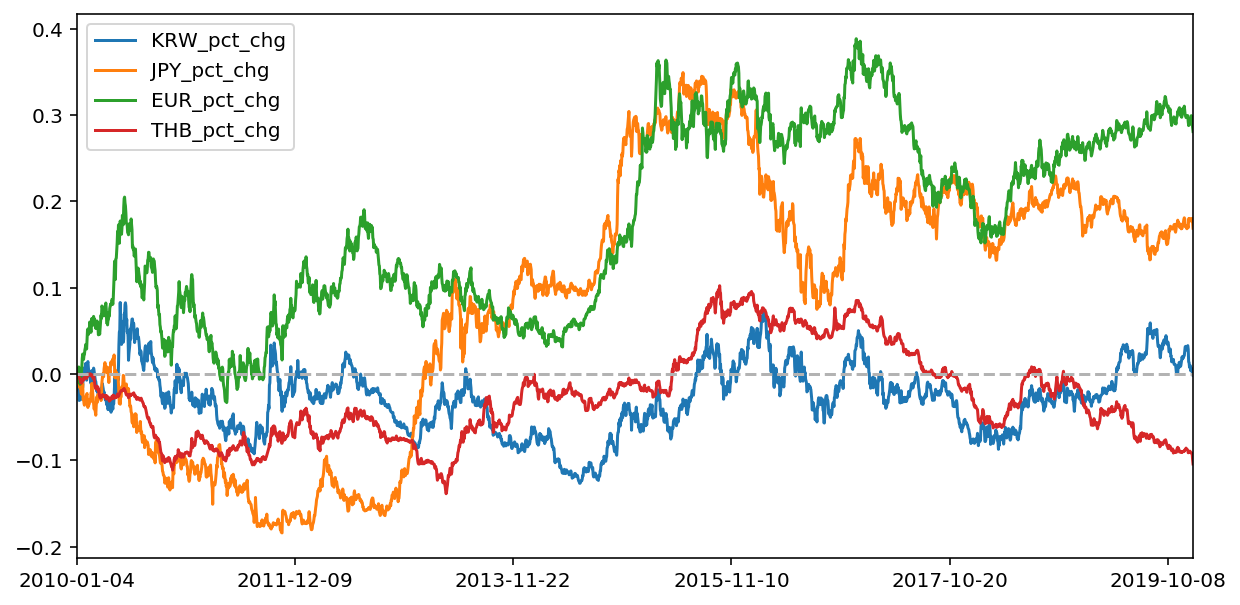

In [ ]:
df.filter(regex='_pct_chg$').plot(figsize=(10, 5))
plt.axhline(0, linestyle='--', color='.7') # ใส่เส้นประที่แกน y มีค่าเป็น 0

## save df ไปเป็น CSV และ Excel

In [ ]:
df.index.rename('date', inplace=True)

In [ ]:
df.to_csv('fx_rate.csv')

In [ ]:
df.to_excel('fx_rate.xlsx')

# Bonus การใช้ regex ในการเลือกแถวและคอลัมน์

In [ ]:
df.filter(regex='^\w{3}$') # คอลัมน์ที่มีชื่อยาว 3 ตัวอักษร

,KRW,JPY,EUR,THB
date,,,,
2010-01-04,1155.306137,92.862603,0.694975,33.205226
2010-01-05,1139.551309,91.773993,0.692425,33.140839
2010-01-06,1134.355401,92.466899,0.696864,33.157491
2010-01-07,1134.997204,93.330537,0.699105,33.164849
2010-01-08,1130.813424,93.435157,0.700624,33.159812
...,...,...,...,...
2019-12-23,1163.449210,109.417607,0.902935,30.165237
2019-12-24,1162.193141,109.377256,0.902527,30.155235
2019-12-27,1160.602528,109.593831,0.896620,30.155115


In [ ]:
df.filter(regex='2010-01', axis=0) # ข้อมูลเดือนมกราคม 2010

,KRW,JPY,EUR,THB,KRW_pct_chg,JPY_pct_chg,EUR_pct_chg,THB_pct_chg
date,,,,,,,,
2010-01-04,1155.306137,92.862603,0.694975,33.205226,0.000000,0.000000,0.000000,0.000000
2010-01-05,1139.551309,91.773993,0.692425,33.140839,-0.013637,-0.011723,-0.003670,-0.001939
2010-01-06,1134.355401,92.466899,0.696864,33.157491,-0.018134,-0.004261,0.002718,-0.001438
2010-01-07,1134.997204,93.330537,0.699105,33.164849,-0.017579,0.005039,0.005942,-0.001216
2010-01-08,1130.813424,93.435157,0.700624,33.159812,-0.021200,0.006166,0.008127,-0.001368
2010-01-11,1119.865088,92.393998,0.688326,33.045154,-0.030677,-0.005046,-0.009568,-0.004821
2010-01-12,1123.817416,91.437055,0.690560,33.035702,-0.027256,-0.015351,-0.006353,-0.005105
2010-01-13,1125.605988,91.341070,0.686672,33.027536,-0.025708,-0.016385,-0.011948,-0.005351
2010-01-14,1120.806296,91.729946,0.690322,32.887616,-0.029862,-0.012197,-0.006696,-0.009565


In [ ]:
df.filter(regex='201[8-9]-01', axis=0) # ข้อมูลเดือนมกราคม 2018 และ 2019

,KRW,JPY,EUR,THB,KRW_pct_chg,JPY_pct_chg,EUR_pct_chg,THB_pct_chg
date,,,,,,,,
2018-01-02,1062.237878,112.184003,0.828844,32.420224,-0.080557,0.208064,0.192623,-0.023641
2018-01-03,1065.782251,112.259835,0.831739,32.529319,-0.077489,0.208881,0.196789,-0.020355
2018-01-04,1063.522586,112.656444,0.828844,32.219644,-0.079445,0.213152,0.192623,-0.029682
2018-01-05,1063.677875,113.283520,0.830220,32.190120,-0.079311,0.219905,0.194604,-0.030571
2018-01-08,1067.293076,113.037668,0.835213,32.209972,-0.076182,0.217257,0.201787,-0.029973
2018-01-09,1068.395910,112.562856,0.838082,32.250251,-0.075227,0.212144,0.205917,-0.028760
2018-01-10,1068.170447,111.424283,0.833889,32.109740,-0.075422,0.199883,0.199883,-0.032991
2018-01-11,1067.096613,111.666805,0.832154,32.004660,-0.076352,0.202495,0.197387,-0.036156
2018-01-12,1062.486611,111.131252,0.823927,31.970009,-0.080342,0.196728,0.185548,-0.037199
